In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Flatten
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
max_fer=10000
max_len=100
batchsize=32
dims=128
epochs=5

In [3]:
(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words=max_fer)
x_train= sequence.pad_sequences(x_train, maxlen=max_len)
x_test= sequence.pad_sequences(x_test, maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Sposób pozwala na w miare szybką nauke lecz jak widać po tych danych stosunkowo szybko dszkło do przeuczenia sieci

In [4]:
model=Sequential()
model.add(Embedding(max_fer, 128 ))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model_ltsm=Sequential()
model_ltsm.add(Embedding(max_fer, dims,input_length=max_len))
model_ltsm.add(LSTM(64))
model_ltsm.add(Dense(1, activation='sigmoid'))
model_ltsm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model_bi= Sequential()
model_bi.add(Embedding(max_fer, dims, input_length=max_len))
model_bi.add(Bidirectional(LSTM(dims)))
model_bi.add(Dense(1, activation='sigmoid'))
model_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model_deep=Sequential()
model_deep.add(Embedding(max_fer, dims, input_length=max_len))
model_deep.add(LSTM(64, return_sequences=True))
model_deep.add(LSTM(64))
model_deep.add(Dense(1, activation='sigmoid'))
model_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
bi=model_bi.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 365s 460ms/step - accuracy: 0.7492 - loss: 0.4958 - val_accuracy: 0.8356 - val_loss: 0.3776
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 367s 442ms/step - accuracy: 0.8926 - loss: 0.2632 - val_accuracy: 0.8535 - val_loss: 0.3385
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 378s 437ms/step - accuracy: 0.9380 - loss: 0.1659 - val_accuracy: 0.8369 - val_loss: 0.4142
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 390s 447ms/step - accuracy: 0.9619 - loss: 0.1065 - val_accuracy: 0.8345 - val_loss: 0.6300
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 388s 455ms/step - accuracy: 0.9634 - loss: 0.0993 - val_accuracy: 0.8347 - val_loss: 0.5562


In [9]:
ltsm=model_ltsm.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 114ms/step - accuracy: 0.7479 - loss: 0.4890 - val_accuracy: 0.8457 - val_loss: 0.3543
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 116ms/step - accuracy: 0.8955 - loss: 0.2612 - val_accuracy: 0.8204 - val_loss: 0.4025
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 108ms/step - accuracy: 0.9330 - loss: 0.1843 - val_accuracy: 0.8387 - val_loss: 0.4174
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.9521 - loss: 0.1298 - val_accuracy: 0.8422 - val_loss: 0.4656
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 116ms/step - accuracy: 0.9717 - loss: 0.0803 - val_accuracy: 0.8416 - val_loss: 0.6001


In [10]:
deep=model_deep.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 175ms/step - accuracy: 0.7297 - loss: 0.5027 - val_accuracy: 0.8448 - val_loss: 0.3664
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 190ms/step - accuracy: 0.8995 - loss: 0.2508 - val_accuracy: 0.8469 - val_loss: 0.3528
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 174ms/step - accuracy: 0.9348 - loss: 0.1724 - val_accuracy: 0.8414 - val_loss: 0.4100
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 188ms/step - accuracy: 0.9595 - loss: 0.1129 - val_accuracy: 0.8414 - val_loss: 0.4610
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 191ms/step - accuracy: 0.9721 - loss: 0.0831 - val_accuracy: 0.8371 - val_loss: 0.5292


In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

clasik=model.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 157ms/step - accuracy: 0.6780 - loss: 0.1347 - val_accuracy: 0.8416 - val_loss: 0.0725
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.9607 - loss: 0.0229 - val_accuracy: 0.8216 - val_loss: 0.1070
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 161ms/step - accuracy: 0.9955 - loss: 0.0032 - val_accuracy: 0.8192 - val_loss: 0.1653
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 148ms/step - accuracy: 0.9961 - loss: 0.0023 - val_accuracy: 0.8116 - val_loss: 0.1745
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 162ms/step - accuracy: 0.9959 - loss: 0.0023 - val_accuracy: 0.8115 - val_loss: 0.2202


Jak widać na poniszych wykresach w tym konkretnym przypadku najbardziej efektywny jest model jednokierunkowy LSTM. Każdorazowo twożąc sieć neuronową należy przeanalizować jakie podejście przyniesie nam największą korzyść.

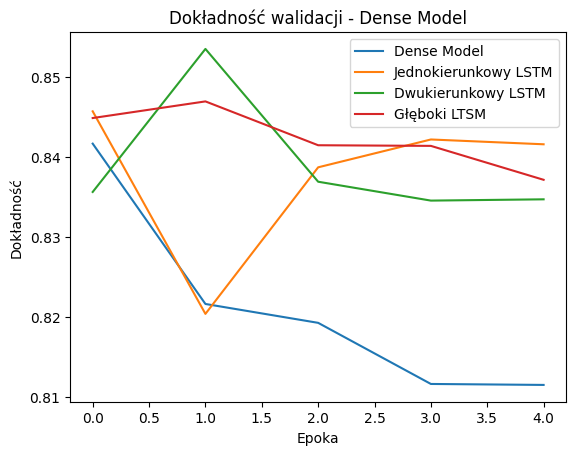

In [12]:
plt.plot(clasik.history['val_accuracy'], label='Dense Model')
plt.plot(ltsm.history['val_accuracy'], label='Jednokierunkowy LSTM')
plt.plot(bi.history['val_accuracy'], label='Dwukierunkowy LSTM')
plt.plot(deep.history['val_accuracy'], label='Głęboki LTSM')
plt.title('Dokładność walidacji - Dense Model')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()